# Health and healthcare dashboard

**Objetive**: <br>
This notebook shows the visualizations for the health dashboard for [Social Digital](https://socialdigital.iadb.org/en/sph). <br>
For new figures and tables, please document the raw data and columns used. <br>

**Author**: <br>
Laura Goyeneche, Consultant SPH, lauragoy@iadb.org

## 1. Basics
Define libraries, working directory, dictionaries and functions.

In [1]:
# Library 
import io
import os 
import boto3
import dotenv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Figures style
sns.set_style("darkgrid")

In [2]:
%%capture 
# Working environments
dotenv.load_dotenv("/home/ec2-user/SageMaker/.env")
sclbucket   = os.environ.get("sclbucket")
scldatalake = os.environ.get("scldatalake")

# Resources and buckets
s3        = boto3.client('s3')
s3_       = boto3.resource("s3")
s3_bucket = s3_.Bucket(sclbucket)

In [3]:
# Define Data Lake path 
path = "Geospatial Basemaps/Cartographic Boundary Files/keys"

In [4]:
# IADB 26-LAC countries
iadb       = pd.read_csv(f"s3://{sclbucket}/{path}/iadb-keys.csv")
codes_iadb = iadb.isoalpha3.unique().tolist()

In [5]:
# OECD countries
oecd       = pd.read_csv(f"s3://{sclbucket}/{path}/oecd-keys.csv") 
codes_oecd = oecd.isoalpha3.unique().tolist()

In [6]:
# World countries
world = pd.read_csv(f"s3://{sclbucket}/{path}/world-keys.csv") 
world = world.rename(columns = {"isoalpha3":"code","country_name_en":"location_name"})
world = world.drop(columns = "income_group")

In [7]:
# Figure function
def bar_plot(data, rowname):
    plt.figure(figsize = (12,4))
    sns.barplot(data = data, x = rowname, y = "Numeric", color = "#21B0D4")
    plt.yticks(fontsize = 7)
    plt.xticks(fontsize = 7)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(temp_.display.unique()[0], fontsize = 10)
    plt.show()

## 2. Inputs

In [8]:
# WHO GHED
path  = "International Organizations/World Health Organization (WHO)/"
path += "Globoal Health Expenditure Database (GHED)"
who_ghed = pd.read_csv(f"s3://{sclbucket}/{path}/GHED_data_processed.csv")

In [9]:
# IHME HAQ
path  = "International Organizations/Institute for Health Metrics and Evaluation (IHME)"
path +="/Healthcare Access and Quality (HAQ) index/processed"
ihme_haq = pd.read_csv(f"s3://{sclbucket}/{path}/haq.csv")

In [10]:
# IHME LE
path  = "International Organizations/Institute for Health Metrics and Evaluation (IHME)/"
path += "Global Burden of Disease (GBD)/processed"
ihme_le = pd.read_csv(f"s3://{sclbucket}/{path}/ihme-gbd-le-hale.csv")

In [11]:
%%capture
# WHO GHO 
path    = "International Organizations/World Health Organization (WHO)/"
path   += "Global Health Observatory (GHO)"
who_gho = pd.read_csv(f"s3://{sclbucket}/{path}/who-gho-api.csv")

## 3. Sections
Figures / graphs per section.

### 3.1. Epi-social determinants

#### 3.1.1. Population using at least basic sanitation services (%)

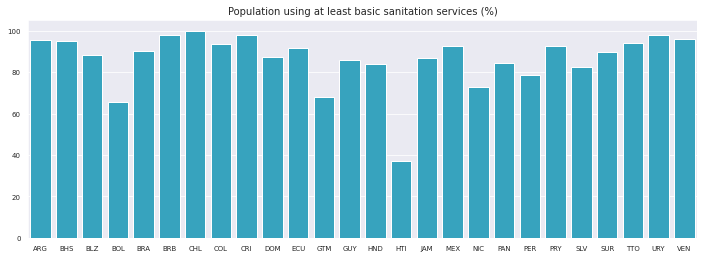

In [12]:
# Select rows of interest 
name_ = "WSH_SANITATION_BASIC"
temp_ = who_gho.copy()
temp_ = temp_[temp_.GHO == name_]
temp_ = temp_[temp_.COUNTRY.isin(codes_iadb)]
temp_ = temp_[temp_.CATEGORY == "TOTL"]
temp_ = temp_[temp_.LATEST == 1]
temp_ = temp_.sort_values("COUNTRY")

# Figure
bar_plot(temp_,"COUNTRY")

#### 3.1.2. Prevalence of overwegiht among adults (%)

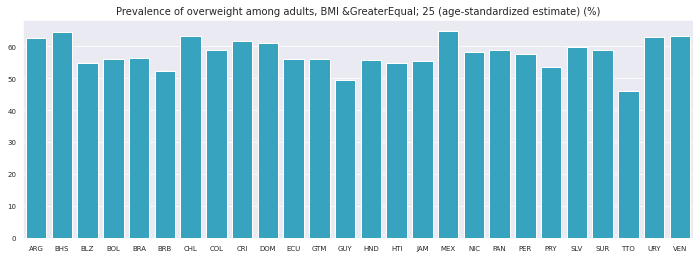

In [13]:
# Select rows of interest 
name_ = "NCD_BMI_25A"
temp_ = who_gho.copy()
temp_ = temp_[temp_.GHO == name_]
temp_ = temp_[temp_.COUNTRY.isin(codes_iadb)]
temp_ = temp_[temp_.CATEGORY == "BTSX-YEARS18-PLUS"]
temp_ = temp_[temp_.LATEST == 1]
temp_ = temp_.sort_values("COUNTRY")

# Figure
bar_plot(temp_,"COUNTRY")

#### 3.1.3. Prevalence of underweight among adults (%)

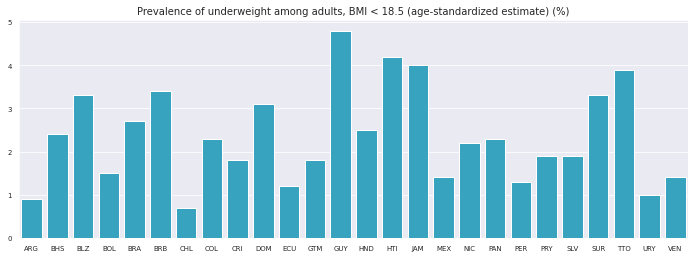

In [14]:
# Select rows of interest 
name_ = "NCD_BMI_18A"
temp_ = who_gho.copy()
temp_ = temp_[temp_.GHO == name_]
temp_ = temp_[temp_.COUNTRY.isin(codes_iadb)]
temp_ = temp_[temp_.CATEGORY == "BTSX-YEARS18-PLUS"]
temp_ = temp_[temp_.LATEST == 1]
temp_ = temp_.sort_values("COUNTRY")

# Figure
bar_plot(temp_,"COUNTRY")

#### 3.1.4. Prevalence of low birth weight (%)

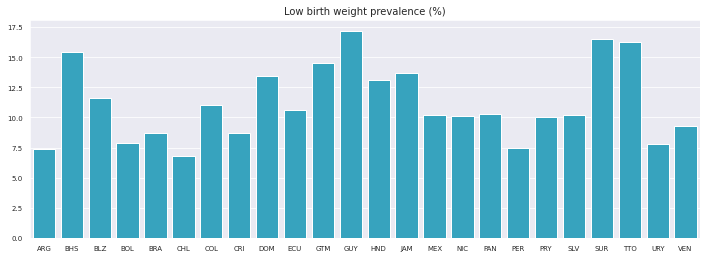

In [15]:
# Select rows of interest 
name_ = "LBW_PREVALENCE"
temp_ = who_gho.copy()
temp_ = temp_[temp_.GHO == name_]
temp_ = temp_[temp_.COUNTRY.isin(codes_iadb)]
temp_ = temp_[temp_.LATEST == 1]
temp_ = temp_.sort_values("COUNTRY")

# Figure
bar_plot(temp_,"COUNTRY")

#### 3.1.5. Prevalence of overweight among children < 5 years (%)

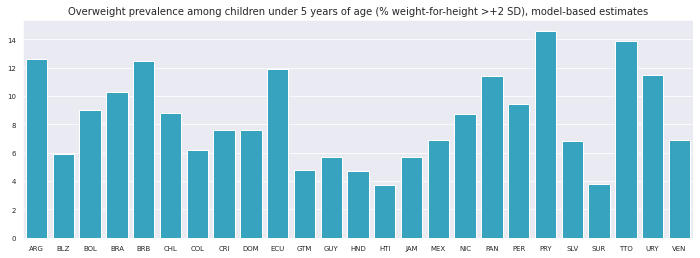

In [16]:
# Select rows of interest 
name_ = "NUTOVERWEIGHTPREV"
temp_ = who_gho.copy()
temp_ = temp_[temp_.GHO == name_]
temp_ = temp_[temp_.COUNTRY.isin(codes_iadb)]
temp_ = temp_[temp_.LATEST == 1]
temp_ = temp_.sort_values("COUNTRY")

# Figure
bar_plot(temp_,"COUNTRY")

### 3.2. Funding and resources

#### 3.2.1. Current Health Expenditure (CHE), by source

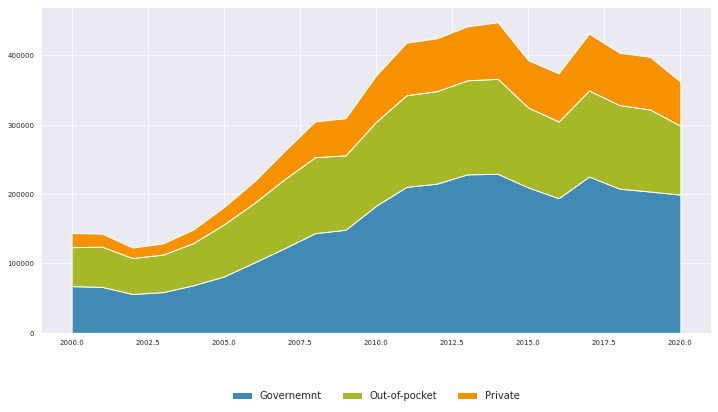

In [17]:
# Define variables of interest
gov = ["gghed_usd","gghed_ppp2020","gghed_usd2020_pc","gghed_ppp2020_pc","gghed_gdp","gghed_che"]
oop = ["hf3_usd"  ,"hf3_ppp2020"  ,"hf3_usd2020_pc"  ,"hf3_ppp2020_pc"  ,"hf3_gdp"  ,"oop_che"  ]
pri = ["hf2_usd"  ,"hf2_ppp2020"  ,"hf2_usd2020_pc"  ,"hf2_ppp2020_pc"  ,"hf2_gdp"  ,"pri_che"  ] 

# Select rows of interest
# Change `n` for different unit of analysis
n     = 0
vars_ = [gov[n], oop[n], pri[n]]
temp_ = who_ghed.copy()
temp_ = temp_[temp_.code == "IADB"]
temp_ = temp_[temp_.var_code.isin(vars_)]
temp_ = temp_.pivot(index = "year", columns = "var_code", values = "value").reset_index()

# Figure
plt.figure(figsize = (12,6))
plt.stackplot(temp_.year, 
              [temp_[i] for i in vars_], 
              labels = ["Governemnt","Out-of-pocket","Private"], 
              colors = ["#418AB3","#A6B727","#F69200"])
plt.legend(ncol = 3, frameon = False, loc = "upper center", bbox_to_anchor = (0.5,-0.15))
plt.yticks(fontsize = 7)
plt.xticks(fontsize = 7)
plt.xlabel("")
plt.ylabel("")
plt.show()

#### 3.2.2. Share of CHE in latest year, by source

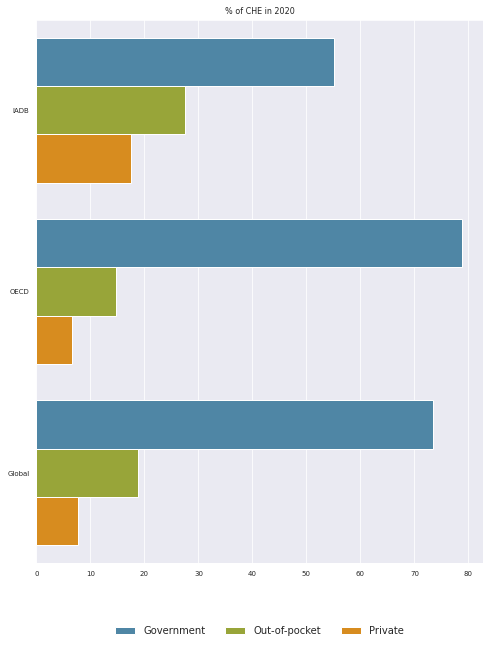

In [18]:
# Define variables of interest
vars_  = ["gghed_che","oop_che","pri_che"]
year_  = who_ghed.year.max()
label_ = {"gghed_che":"Government","oop_che":"Out-of-pocket","pri_che":"Private"}

# Select rows of interest
temp_ = who_ghed.copy()
temp_ = temp_[temp_.code.isin(["IADB","OECD","Global"])]
temp_ = temp_[temp_.var_code.isin(vars_)]
temp_ = temp_[temp_.year == year_]

# Rename labels
temp_.var_name = temp_.var_code.replace(label_)

# Figure 
plt.figure(figsize = (8,10))
sns.barplot(data = temp_, x = "value", y = "code", hue = "var_name", palette = ["#418AB3","#A6B727","#F69200"]) 
plt.yticks(fontsize = 7)
plt.xticks(fontsize = 7)
plt.xlabel("")
plt.ylabel("")
plt.legend(ncol = 3, frameon = False, loc = "lower center", bbox_to_anchor = (0.5,-0.15))
plt.title(f"% of CHE in {year_}", fontsize = 8)
plt.show()

#### 3.2.3. Share of CHE in latest year, by country and source

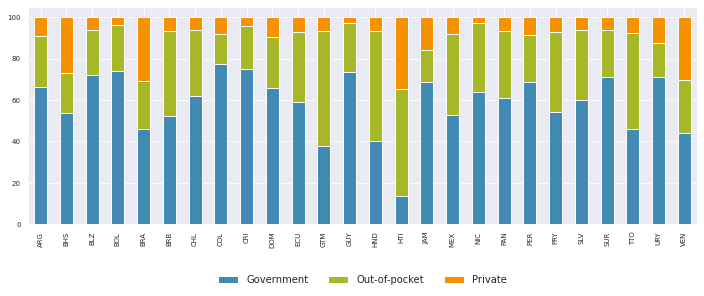

In [19]:
# Define variables of interest
vars_  = ["gghed_che","oop_che","pri_che"]
year_  = who_ghed.year.max()
label_ = {"gghed_che":"Government","oop_che":"Out-of-pocket","pri_che":"Private"}

# Select rows of interest
temp_ = who_ghed.copy()
temp_ = temp_[temp_.code.isin(codes_iadb)]
temp_ = temp_[temp_.var_code.isin(vars_)]
temp_ = temp_[temp_.year == year_]
temp_ = temp_.set_index("code")

# Rename labels
temp_.var_name = temp_.var_code.replace(label_)

# Reshape data
temp_ = temp_.drop(columns = ["country","year","var_code"])
temp_ = temp_.pivot(columns = "var_name", values = "value")

# Figure
temp_.plot(kind = "bar", stacked = True, figsize = (12,4), color = ["#418AB3","#A6B727","#F69200"])
plt.yticks(fontsize = 7)
plt.xticks(fontsize = 7)
plt.xlabel("")
plt.ylabel("")
plt.legend(ncol = 3, frameon = False, loc = "lower center", bbox_to_anchor = (0.5,-0.32))
plt.show()

#### 3.2.4. Hospital beds per 10,000 inhabitants

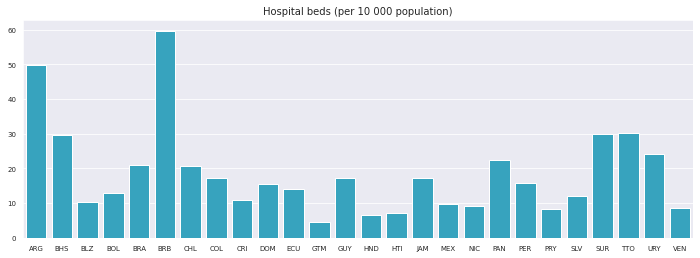

In [20]:
# Select rows of interest 
name_ = "WHS6_102"
temp_ = who_gho.copy()
temp_ = temp_[temp_.GHO == name_]
temp_ = temp_[temp_.COUNTRY.isin(codes_iadb)]
temp_ = temp_[temp_.LATEST == 1]
temp_ = temp_.sort_values("COUNTRY")

# Figure
bar_plot(temp_,"COUNTRY")

#### 3.2.5. Doctor per 10,000 inhabitants

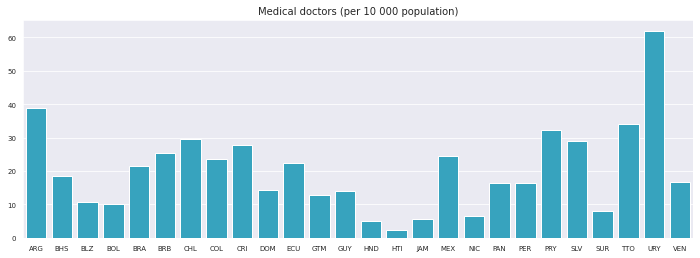

In [21]:
# Select rows of interest 
name_ = "HWF_0001"
temp_ = who_gho.copy()
temp_ = temp_[temp_.GHO == name_]
temp_ = temp_[temp_.COUNTRY.isin(codes_iadb)]
temp_ = temp_[temp_.LATEST == 1]
temp_ = temp_.sort_values("COUNTRY")

# Figure
bar_plot(temp_,"COUNTRY")

### 3.3. Coverage and quality

#### 3.3.1. Vaccination coverage

In [22]:
# Select variables of interest
vars_ = ["WHS4_543","WHS8_110"]

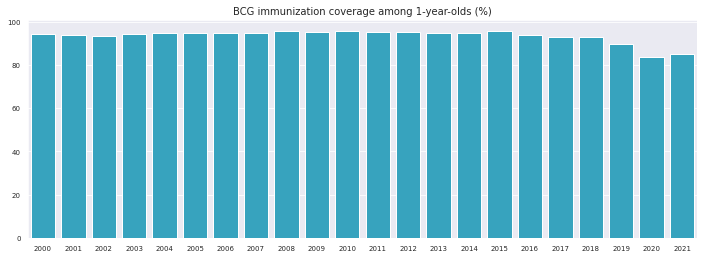

In [23]:
# Select rows of interest 
n     = 0
name_ = vars_[n]
temp_ = who_gho.copy()
temp_ = temp_[temp_.GHO == name_]
temp_ = temp_[temp_.COUNTRY.isin(codes_iadb)]
temp_ = temp_.groupby(["YEAR","display"]).Numeric.mean().reset_index()
temp_

# Figure
bar_plot(temp_,"YEAR")

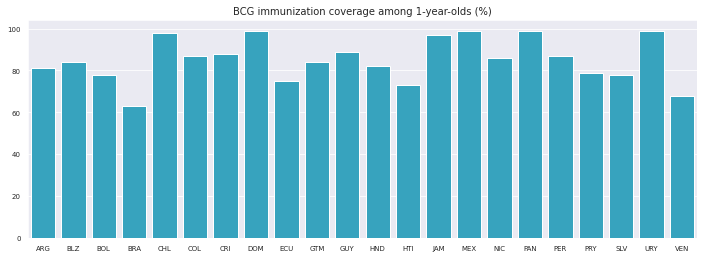

In [24]:
# Select rows of interest 
n     = 0
name_ = vars_[n]
temp_ = who_gho.copy()
temp_ = temp_[temp_.GHO == name_]
temp_ = temp_[temp_.COUNTRY.isin(codes_iadb)]
temp_ = temp_[temp_.LATEST == 1]
temp_ = temp_.sort_values("COUNTRY")

# Figure
bar_plot(temp_,"COUNTRY")

#### 3.3.2. UHC Service Coverage Index

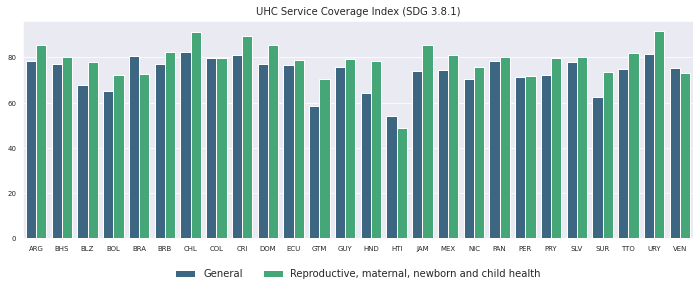

In [25]:
# Select rows of interest
name_ = ["UHC_INDEX_REPORTED","UHC_SCI_RMNCH"]
temp_ = who_gho.copy()
temp_ = temp_[temp_.GHO.isin(name_)]
temp_ = temp_[temp_.COUNTRY.isin(codes_iadb)]
temp_ = temp_[temp_.LATEST == 1]
temp_ = temp_.sort_values("COUNTRY")

# Add labels
labels_         = ["General","Reproductive, maternal, newborn and child health"]
temp_["label_"] = temp_.display.replace(dict(zip(temp_.display.unique().tolist(),labels_)))

# Figure 
plt.figure(figsize = (12,4))
sns.barplot(data = temp_, x = "COUNTRY", y = "Numeric", hue = "label_", palette = "viridis")
plt.legend(loc = "upper center", ncol = 2, frameon = False, bbox_to_anchor=(.5, -0.1))
plt.title(temp_.display.unique()[0], fontsize = 10)
plt.yticks(fontsize = 7)
plt.xticks(fontsize = 7)
plt.xlabel("")
plt.ylabel("")
plt.show()

#### 3.3.3. HAQ index

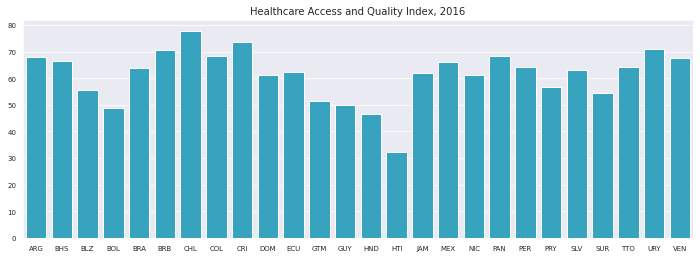

In [26]:
# Select rows of interest
temp_ = ihme_haq.copy()
temp_ = temp_.merge(iadb[["isoalpha3","iadbcode"]].rename(columns = {"isoalpha3":"code"}), on = "code", how = "left")
temp_.iadbcode = np.where(temp_.iadbcode.isna(),0,1)
temp_ = temp_[temp_.iadbcode == 1]
temp_ = temp_[temp_.year == temp_.year.max()]
temp_ = temp_[temp_.indicator_name == "Healthcare Access and Quality Index"]
temp_ = temp_.sort_values("code")

# Figure 
plt.figure(figsize = (12,4))
sns.barplot(data = temp_, x = "code", y = "val", color = "#21B0D4")
plt.title(f"{temp_.indicator_name.unique()[0]}, {temp_.year.max()}", fontsize = 10)
plt.yticks(fontsize = 7)
plt.xticks(fontsize = 7)
plt.xlabel("")
plt.ylabel("")
plt.show()

### 3.4. Population health

#### 3.4.1. Life (Healthy Life) expectancy

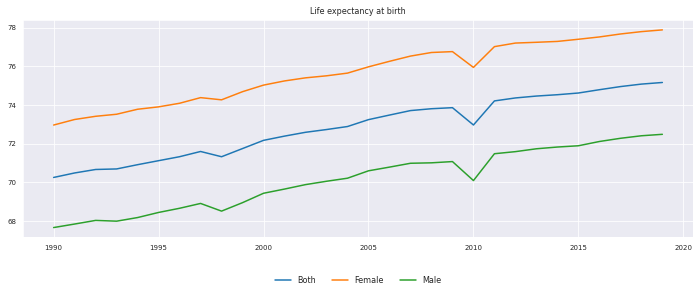

In [27]:
# Define variables of interest
# Change `n` for different variable
vars_  = ["Life expectancy at birth","Healthy Life Expectancy at birth"]
year_  = ihme_le.year.max()

# Select rows of interest
n     = 0
temp_ = ihme_le.copy()
temp_ = temp_[temp_.measure_name == vars_[n]] 
temp_ = temp_[temp_.age_name == "<1 year"]
temp_ = temp_[temp_.code == "IADB"]

# Figure 
plt.figure(figsize = (12,4))
sns.lineplot(data = temp_, x = "year", y = "val", hue = "sex_name")
plt.yticks(fontsize = 7)
plt.xticks(fontsize = 7)
plt.xlabel("")
plt.ylabel("")
plt.title(f"{temp_.measure_name.unique()[0]}", fontsize = 8)
plt.legend(ncol = 3, frameon = False, loc = "lower center", bbox_to_anchor = (0.5,-0.25), fontsize = 8)
plt.show()

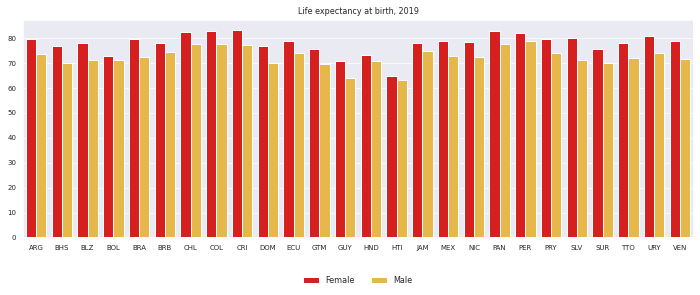

In [28]:
# Define variables of interest
# Change `n` for different variable
vars_  = ["Life expectancy at birth","Healthy Life Expectancy at birth"]
year_  = ihme_le.year.max()

# Select rows of interest
n     = 0
temp_ = ihme_le.copy()
temp_ = temp_[temp_.measure_name == vars_[n]] 
temp_ = temp_[temp_.age_name == "<1 year"]
temp_ = temp_[temp_.year == year_]
temp_ = temp_[temp_.sex_name.isin(["Female","Male"])]
temp_ = temp_[temp_.code.isin(codes_iadb)]
temp_ = temp_.sort_values("code")

# Figure 
plt.figure(figsize = (12,4))
sns.barplot(data = temp_, x = "code", y = "val", hue = "sex_name", palette = ["#F50000","#FFC233"])
plt.yticks(fontsize = 7)
plt.xticks(fontsize = 7)
plt.xlabel("")
plt.ylabel("")
plt.title(f"{temp_.measure_name.unique()[0]}, {temp_.year.max()}", fontsize = 8)
plt.legend(ncol = 2, frameon = False, loc = "lower center", bbox_to_anchor = (0.5,-0.25), fontsize = 8)
plt.show()

#### 3.4.2. Mortality rates

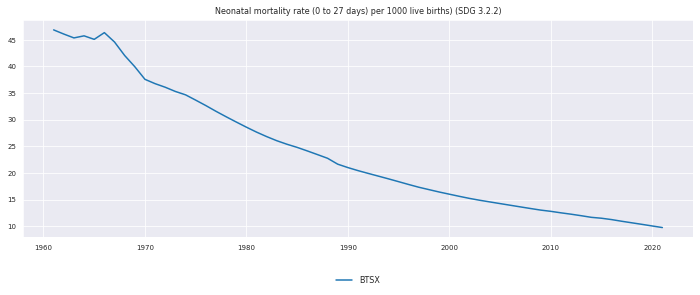

In [29]:
# Define variables of interest
# Change `n` for different variable
vars_ = ["WHOSIS_000003","MDG_0000000001"]
n     = 0

# Select rows of interest
name_ = vars_[n]
temp_ = who_gho.copy()
temp_ = temp_[temp_.GHO == name_]
temp_ = temp_[temp_.COUNTRY.isin(codes_iadb)]
temp_ = temp_[temp_.YEAR > 1960]
temp_ = temp_[["YEAR","Numeric","display","CATEGORY"]]
temp_ = temp_.groupby(["YEAR","display","CATEGORY"]).mean().reset_index()

# Figure 
plt.figure(figsize = (12,4))
sns.lineplot(data = temp_, x = "YEAR", y = "Numeric", hue = "CATEGORY")
plt.yticks(fontsize = 7)
plt.xticks(fontsize = 7)
plt.xlabel("")
plt.ylabel("")
plt.title(f"{temp_.display.unique()[0]}", fontsize = 8)
plt.legend(ncol = 3, frameon = False, loc = "lower center", bbox_to_anchor = (0.5,-0.25), fontsize = 8)
plt.show()

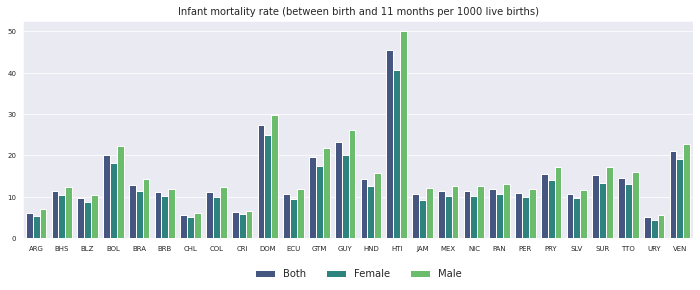

In [34]:
# Define variables of interest
# Change `n` for different variable
vars_ = ["WHOSIS_000003","MDG_0000000001"]
n     = 1

# Select rows of interest
name_ = vars_[n]
temp_ = who_gho.copy()
temp_ = temp_[temp_.GHO == name_]
temp_ = temp_[temp_.COUNTRY.isin(codes_iadb)]
temp_ = temp_[temp_.LATEST == 1]
temp_ = temp_.sort_values("COUNTRY")

# Rename labels
temp_.CATEGORY = temp_.CATEGORY.replace({"BTSX":"Both","FMLE":"Female","MLE":"Male"})

# Figure 
plt.figure(figsize = (12,4))
sns.barplot(data = temp_, x = "COUNTRY", y = "Numeric", hue = "CATEGORY", palette = "viridis")
plt.legend(loc = "upper center", ncol = 3, frameon = False, bbox_to_anchor=(.5, -0.1))
plt.title(temp_.display.unique()[0], fontsize = 10)
plt.yticks(fontsize = 7)
plt.xticks(fontsize = 7)
plt.xlabel("")
plt.ylabel("")
plt.show()

### 3.5. Financial protection

#### 3.5.1. Out-of-pocket spending in LAC

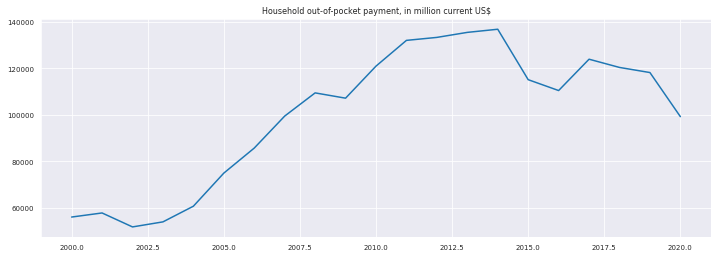

In [35]:
# Define variables of interest
oop = ["hf3_usd","hf3_ppp2020","hf3_usd2020_pc","hf3_ppp2020_pc","hf3_gdp","oop_che"]

# Select rows of interest
# Change `n` for different unit of analysis
n     = 0
vars_ = [oop[n]]
temp_ = who_ghed.copy()
temp_ = temp_[temp_.code == "IADB"]
temp_ = temp_[temp_.var_code.isin(vars_)]

# Figure
plt.figure(figsize = (12,4))
sns.lineplot(data = temp_, x = "year", y = "value")
plt.title(temp_.var_name.unique()[0], fontsize = 8)
plt.yticks(fontsize = 7)
plt.xticks(fontsize = 7)
plt.xlabel("")
plt.ylabel("")
plt.show()

#### 3.5.2. Out-of-pocket as % of CHE

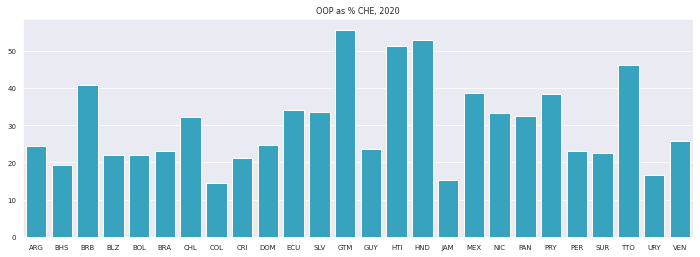

In [36]:
# Select rows of interest
temp_ = who_ghed.copy()
temp_ = temp_[temp_.code.isin(codes_iadb)]
temp_ = temp_[temp_.var_code == "oop_che"]
temp_ = temp_[temp_.year == temp_.year.max()]
temp_

# Figure
plt.figure(figsize = (12,4))
sns.barplot(data = temp_, x = "code", y = "value", color = "#21B0D4")
plt.yticks(fontsize = 7)
plt.xticks(fontsize = 7)
plt.xlabel("")
plt.ylabel("")
plt.title(f"{temp_.var_name.unique()[0]}, {temp_.year.max()}", fontsize = 8)
plt.show()

#### 3.5.3. Catastrophic out-of-pocket spending (%)

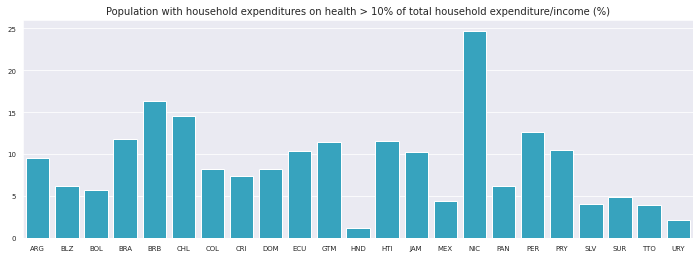

In [37]:
# Select rows of interest 
name_ = "FINPROTECTION_CATA_TOT_10_POP"
temp_ = who_gho.copy()
temp_ = temp_[temp_.GHO == name_]
temp_ = temp_[temp_.COUNTRY.isin(codes_iadb)]
temp_ = temp_[temp_.CATEGORY == "TOTL"]
temp_ = temp_[temp_.LATEST == 1]
temp_ = temp_.sort_values("COUNTRY")
temp_.display = "Population with household expenditures on health > 10% of total household expenditure/income (%)"

# Figure
bar_plot(temp_, "COUNTRY")